In [1]:
#Import Libraries
import pandas as pd
import cufflinks as cf
import numpy as np
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


,0,1,2,3,4,5,6,7
0,1,1383260400000,0,0.081363,NaN,NaN,NaN,NaN
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
2,1,1383261000000,0,0.136588,NaN,NaN,0.027300,NaN
3,1,1383261000000,33,NaN,NaN,NaN,NaN,0.026137
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963


In [ ]:
#read Dataset
data = pd.read_csv('C:\\Users\\ElsaTurcios\\Documents\\CDR\\sms-call-internet-mi-2013-11-01\\sms-call-internet-mi-2013-11-01.txt', header = None, delimiter = '\t')
data.head()

In [2]:
#Size of the data set
data.shape

(4842625, 8)

In [3]:
#add name to the column
data.rename(columns={data.columns[0]: 'square_id', data.columns[1]: 'time_inteval',data.columns[2]:'country_code',data.columns[3]:'SMS_in_activity',data.columns[4]:'SMS_out_activity',data.columns[5]:'call_in_activity',data.columns[6]:'call_out_activity',data.columns[7]:'internet_traffic_activity'}, inplace=True)
data.head()

,square_id,time_inteval,country_code,SMS_in_activity,SMS_out_activity,call_in_activity,call_out_activity,internet_traffic_activity
0,1,1383260400000,0,0.081363,NaN,NaN,NaN,NaN
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
2,1,1383261000000,0,0.136588,NaN,NaN,0.027300,NaN
3,1,1383261000000,33,NaN,NaN,NaN,NaN,0.026137
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963


In [4]:
#Fill empty data with 0
data = data.fillna(0)

In [5]:
#Shows head of the dataset
data.head()

,square_id,time_inteval,country_code,SMS_in_activity,SMS_out_activity,call_in_activity,call_out_activity,internet_traffic_activity
0,1,1383260400000,0,0.081363,0.000000,0.000000,0.000000,0.000000
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
2,1,1383261000000,0,0.136588,0.000000,0.000000,0.027300,0.000000
3,1,1383261000000,33,0.000000,0.000000,0.000000,0.000000,0.026137
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963


,square_id,time_inteval,country_code,SMS_in_activity,SMS_out_activity,call_in_activity,call_out_activity,internet_traffic_activity
square_id,1.000000,0.011541,-0.007226,0.075688,0.058725,0.056626,0.058602,0.062838
time_inteval,0.011541,1.000000,-0.000958,0.055146,0.029194,0.055940,0.054317,-0.006251
country_code,-0.007226,-0.000958,1.000000,-0.017966,-0.011705,-0.011785,-0.012001,-0.014244
SMS_in_activity,0.075688,0.055146,-0.017966,1.000000,0.632630,0.708067,0.706001,0.675875
SMS_out_activity,0.058725,0.029194,-0.011705,0.632630,1.000000,0.690303,0.683526,0.699730
call_in_activity,0.056626,0.055940,-0.011785,0.708067,0.690303,1.000000,0.917183,0.814620
call_out_activity,0.058602,0.054317,-0.012001,0.706001,0.683526,0.917183,1.000000,0.797583
internet_traffic_activity,0.062838,-0.006251,-0.014244,0.675875,0.699730,0.814620,0.797583,1.000000


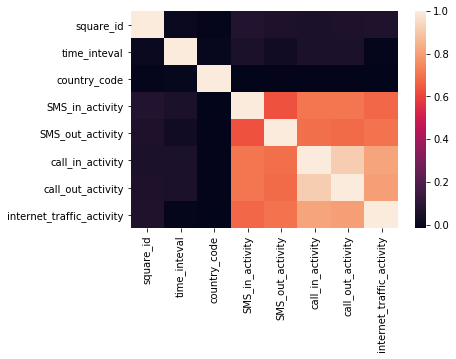

In [7]:
#Correlation of the data and heatmap
sns.heatmap(data.corr())
data.corr()



In [8]:
#Desciptive stats
data.describe()

,square_id,time_inteval,country_code,SMS_in_activity,SMS_out_activity,call_in_activity,call_out_activity,internet_traffic_activity
count,4.842625e+06,4.842625e+06,4.842625e+06,4.842625e+06,4.842625e+06,4.842625e+06,4.842625e+06,4.842625e+06
mean,5.194043e+03,1.383307e+12,1.745873e+02,9.512170e-01,5.828306e-01,5.416071e-01,6.601301e-01,1.703193e+01
std,2.749168e+03,2.279395e+07,2.798642e+03,2.751756e+00,2.381054e+00,2.173160e+00,2.481637e+00,5.760033e+01
min,1.000000e+00,1.383260e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.989000e+03,1.383292e+12,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.291000e+03,1.383308e+12,3.900000e+01,7.059599e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.439000e+03,1.383326e+12,4.600000e+01,7.160367e-01,1.601933e-01,8.942455e-02,2.404053e-01,6.888950e+00
max,1.000000e+04,1.383346e+12,9.725900e+04,2.340182e+02,2.957258e+02,1.909894e+02,1.878688e+02,4.995605e+03


In [9]:
#Median of the activities groupby the country code
x=data.groupby('country_code').median()
print(x)


              square_id  time_inteval  SMS_in_activity  SMS_out_activity  \
country_code                                                               
0                5061.0  1.383309e+12         0.448745          0.000000   
1                5360.0  1.383314e+12         0.000000          0.000000   
7                5450.0  1.383310e+12         0.000000          0.000000   
20               5742.0  1.383319e+12         0.000000          0.000000   
27               3259.5  1.383314e+12         0.000000          0.000000   
30               5162.0  1.383316e+12         0.000000          0.000000   
31               5375.0  1.383310e+12         0.000000          0.000000   
32               5449.0  1.383307e+12         0.000000          0.000000   
33               5646.0  1.383309e+12         0.000000          0.000000   
34               5557.0  1.383314e+12         0.000000          0.000000   
36               5037.0  1.383317e+12         0.000000          0.000000   
39          

In [16]:
x.head()

,square_id,time_inteval,SMS_in_activity,SMS_out_activity,call_in_activity,call_out_activity,internet_traffic_activity
country_code,,,,,,,
0,5061.0,1.383309e+12,0.448745,0.0,0.0,0.000000,0.0
1,5360.0,1.383314e+12,0.000000,0.0,0.0,0.000000,0.0
7,5450.0,1.383310e+12,0.000000,0.0,0.0,0.000000,0.0
20,5742.0,1.383319e+12,0.000000,0.0,0.0,0.100862,0.0
27,3259.5,1.383314e+12,0.000000,0.0,0.0,0.000000,0.0


In [11]:
#Setting the credentials to use Plotly API
tls.set_credentials_file(username='elsarebecat86', api_key='rygWhQ7fmiRV2CNJLAOX')

In [18]:
#EXAMPLE USING PLOTLY
# a=np.linspace(start=0,stop=36,num=36)
# np.random.seed(25)
# b=np.random.uniform(low=0.0, high=1.0, size=36)
# trace=go.Scatter(x=a,y=b)
# data1=[trace]
# py.iplot(data1, filename='basic-line-chart')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~elsarebecat86/0 or inside your plot.ly account where it is named 'basic-line-chart'


In [13]:
data.head()

,square_id,time_inteval,country_code,SMS_in_activity,SMS_out_activity,call_in_activity,call_out_activity,internet_traffic_activity
0,1,1383260400000,0,0.081363,0.000000,0.000000,0.000000,0.000000
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
2,1,1383261000000,0,0.136588,0.000000,0.000000,0.027300,0.000000
3,1,1383261000000,33,0.000000,0.000000,0.000000,0.000000,0.026137
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963


In [17]:
#Graph of the median of activities groupby the country code
layout=dict(title='test_cdr',xaxis=dict(title='Country_Code'),yaxis=dict(title='Activity'))
x.iplot(filename='test',layout=layout)

In [19]:
sq_id=data.groupby('square_id').median()
print(sq_id)


           time_inteval  country_code  SMS_in_activity  SMS_out_activity  \
square_id                                                                  
1          1.383308e+12          39.0         0.137751               0.0   
2          1.383308e+12          39.0         0.138512               0.0   
3          1.383308e+12          39.0         0.166508               0.0   
4          1.383308e+12          39.0         0.135707               0.0   
5          1.383308e+12          39.0         0.121324               0.0   
6          1.383308e+12          39.0         0.166508               0.0   
7          1.383308e+12          39.0         0.166508               0.0   
8          1.383308e+12          39.0         0.166508               0.0   
9          1.383308e+12          39.0         0.166508               0.0   
10         1.383307e+12          39.0         0.110259               0.0   
11         1.383308e+12          39.0         0.076831               0.0   
12         1

The draw time for this plot will be slow for all clients.


C:\Users\ElsaTurcios\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



In [20]:
#Graph of the median of activities groupby the sq_id
layout=dict(title='Sq_ID activity',xaxis=dict(title='sq_id'),yaxis=dict(title='Activity'))
sq_id.iplot(filename='sq_id',layout=layout)

The draw time for this plot will be slow for all clients.


C:\Users\ElsaTurcios\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Too Long

